In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DMML Project/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.shape

(4653, 9)

In [ ]:
df.isnull()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4648,False,False,False,False,False,False,False,False,False
4649,False,False,False,False,False,False,False,False,False
4650,False,False,False,False,False,False,False,False,False
4651,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
df1=df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Education']= le.fit_transform(df1['Education'])
df1['Gender']= le.fit_transform(df1['Gender'])
df1['EverBenched']= le.fit_transform(df1['EverBenched'])
df1['PaymentTier']= le.fit_transform(df1['PaymentTier'])
df1['City']= le.fit_transform(df1['City'])

In [ ]:
le.classes_

array(['Bangalore', 'New Delhi', 'Pune'], dtype=object)

In [ ]:
df1

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,2,34,1,0,0,0
1,0,2013,2,0,28,0,0,3,1
2,0,2014,1,2,38,0,0,2,0
3,1,2016,0,2,27,1,0,5,1
4,1,2017,2,2,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,2,26,0,0,4,0
4649,1,2013,2,1,37,1,0,2,1
4650,1,2018,1,2,27,1,0,5,1
4651,0,2012,0,2,30,1,1,2,0


In [ ]:
X = df1.drop('LeaveOrNot', axis=1)
y = df1['LeaveOrNot']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dtc=tree.DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)
y_test_prediction=dtc.predict(X_test)
test_data_accuracy=accuracy_score(y_test_prediction,y_test)
print('Accuracy : ',test_data_accuracy*100)

Accuracy :  81.203007518797


#Fearure Selection

In [ ]:
X = df1.drop('LeaveOrNot', axis=1) #independent columns
y = df1['LeaveOrNot']   #target column

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
fit_features = SelectKBest(score_func= f_classif,k='all')

fit_features.fit(X,y)

SelectKBest(k='all')

In [ ]:
fs= pd.DataFrame(fit_features.scores_ ,index=X.columns,columns=['score values'])
fs

,score values
Education,30.334017
JoiningYear,158.804761
City,195.933669
PaymentTier,189.055909
Age,12.188907
Gender,238.143915
EverBenched,28.792312
ExperienceInCurrentDomain,4.331793


In [ ]:
do=fs.nlargest(20,'score values')
do

,score values
Gender,238.143915
City,195.933669
PaymentTier,189.055909
JoiningYear,158.804761
Education,30.334017
EverBenched,28.792312
Age,12.188907
ExperienceInCurrentDomain,4.331793


In [ ]:
df1=df1.drop(['Age','ExperienceInCurrentDomain','EverBenched','Education'], axis =1)

In [ ]:
X = df1.drop('LeaveOrNot', axis=1) #independent columns
y = df1['LeaveOrNot']   #target column i.e price range

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Decision Tree

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dtc=tree.DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)
y_test_prediction=dtc.predict(X_test)
test_data_accuracy=accuracy_score(y_test_prediction,y_test)
print('Accuracy : ',test_data_accuracy*100)

Accuracy :  82.49194414607949


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       610
           1       0.87      0.58      0.70       321

    accuracy                           0.82       931
   macro avg       0.84      0.77      0.79       931
weighted avg       0.83      0.82      0.81       931



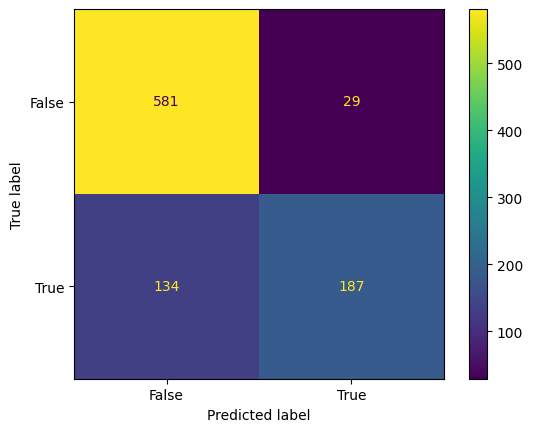

Confusion Matrix



,0,1
0,581,29
1,134,187


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = y_test
predicted = y_test_prediction

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print("Confusion Matrix\n")
pd.DataFrame(confusion_matrix)